In [83]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

Сгенерируем данные как y = 2X + 5 + белый шум

In [84]:
X1 = 10 * r.rand(300,1)
X2 = 10 + 10 * r.rand(300,1)
X = np.vstack([X1,X2])
print(X)

[[ 4.91337669]
 [ 0.25005678]
 [ 3.34138691]
 [ 5.43582553]
 [ 6.38934543]
 [ 9.41118196]
 [ 4.35609406]
 [ 8.17663547]
 [ 4.83270968]
 [ 7.91837997]
 [ 0.65509834]
 [ 6.22506056]
 [ 6.59221076]
 [ 0.85771528]
 [ 3.87344294]
 [ 7.83096827]
 [ 3.49242529]
 [ 5.4559684 ]
 [ 5.75407575]
 [ 1.95861166]
 [ 0.44371428]
 [ 5.34132157]
 [ 4.26186965]
 [ 5.65976675]
 [ 9.86964245]
 [ 5.86537167]
 [ 3.5532128 ]
 [ 9.65061279]
 [ 9.08063146]
 [ 2.336163  ]
 [ 7.07625015]
 [ 0.41273281]
 [ 5.66479051]
 [ 6.486848  ]
 [ 2.20933473]
 [ 6.36852647]
 [ 8.50030409]
 [ 8.88446456]
 [ 4.77686667]
 [ 8.45281225]
 [ 7.06055789]
 [ 1.10250175]
 [ 3.99834766]
 [ 0.80001632]
 [ 2.63833058]
 [ 2.23906439]
 [ 6.99552432]
 [ 8.5546128 ]
 [ 8.21784286]
 [ 7.29511355]
 [ 5.7716501 ]
 [ 3.47534236]
 [ 2.98026784]
 [ 5.77543465]
 [ 4.10129174]
 [ 9.09530404]
 [ 4.81802885]
 [ 7.66821929]
 [ 5.94656137]
 [ 6.34215684]
 [ 7.59403682]
 [ 1.1398728 ]
 [ 9.16513698]
 [ 0.27501471]
 [ 4.19706795]
 [ 2.38321804]
 [ 3.35179

In [95]:
y1 = 5*X1-0.15*X1*X1 + r.randn(300,1)#2*X1 + r.randn(300,1)
y2 = 5*X2-0.15*X2*X2 + r.randn(300,1)
y = np.vstack([y1,y2])
print(y)

[[19.8797228 ]
 [ 2.34194504]
 [16.98331337]
 [23.52712389]
 [26.62807585]
 [34.74160445]
 [17.26026491]
 [30.82720569]
 [18.35577215]
 [29.64825937]
 [ 3.99879108]
 [26.22591899]
 [27.75475934]
 [ 4.23909535]
 [15.85132233]
 [30.2639956 ]
 [15.59577629]
 [23.42409295]
 [23.86435248]
 [ 9.3458343 ]
 [ 2.23956051]
 [24.04345972]
 [19.82351491]
 [21.53170854]
 [33.98177625]
 [24.80080132]
 [16.25025345]
 [33.24202514]
 [35.78261229]
 [11.57488315]
 [27.60258232]
 [ 2.30409486]
 [22.70156404]
 [26.50082883]
 [ 8.47107458]
 [24.48149512]
 [30.73952406]
 [32.90427065]
 [18.79885845]
 [33.70184061]
 [27.49393368]
 [ 5.86911792]
 [17.7121042 ]
 [ 4.51097269]
 [12.13690684]
 [10.81505205]
 [27.72648058]
 [32.68598825]
 [31.31434329]
 [29.15183185]
 [23.77719773]
 [16.06490484]
 [15.57563212]
 [23.0786964 ]
 [17.40053223]
 [33.84128516]
 [21.15961767]
 [29.136758  ]
 [24.88145372]
 [25.92512681]
 [29.67408354]
 [ 4.96234693]
 [35.22014594]
 [ 0.61149284]
 [19.48364634]
 [13.30082287]
 [15.01575

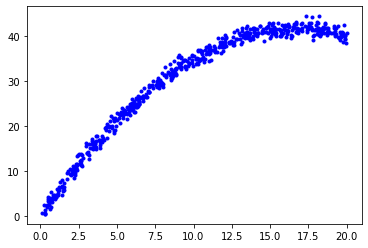

In [96]:
plt.plot(X, y, "b.")

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.333, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.333, random_state=1)

In [99]:
X_train1.shape

(200, 1)

Добавляем 1 в матрицу прихнаков для свободного члена ($X_0 = 1$)

In [100]:
X_train11=np.c_[np.ones((200,1)),X_train1]
X_train22=np.c_[np.ones((200,1)),X_train2]

In [101]:
X_train11[:3]

array([[1.        , 8.85279274],
       [1.        , 1.10250175],
       [1.        , 2.58673206]])

Решим нормальное уравнение $w = \left(X^T X\right)^{-1}X^T y$

In [102]:
w1=np.linalg.inv(X_train11.T.dot(X_train11)).dot(X_train11.T).dot(y_train1)
w2=np.linalg.inv(X_train22.T.dot(X_train22)).dot(X_train22.T).dot(y_train2)

In [103]:
w1

array([[2.65836905],
       [3.48854316]])

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
reg1 = LinearRegression().fit(X_train1, y_train1)
reg2 = LinearRegression().fit(X_train2, y_train2)

Те же самые коэффициенты

In [106]:
reg1.intercept_[0], reg1.coef_[0,1]

IndexError: index 1 is out of bounds for axis 1 with size 1

Заметим, что полученные значения близки к реальным 5 и 2 (y = 2X + 5 + белый шум)

In [107]:
y_pred1 = w1[1]*X_test1 + w1[0]
y_pred2 = w2[1]*X_test2 + w2[0]

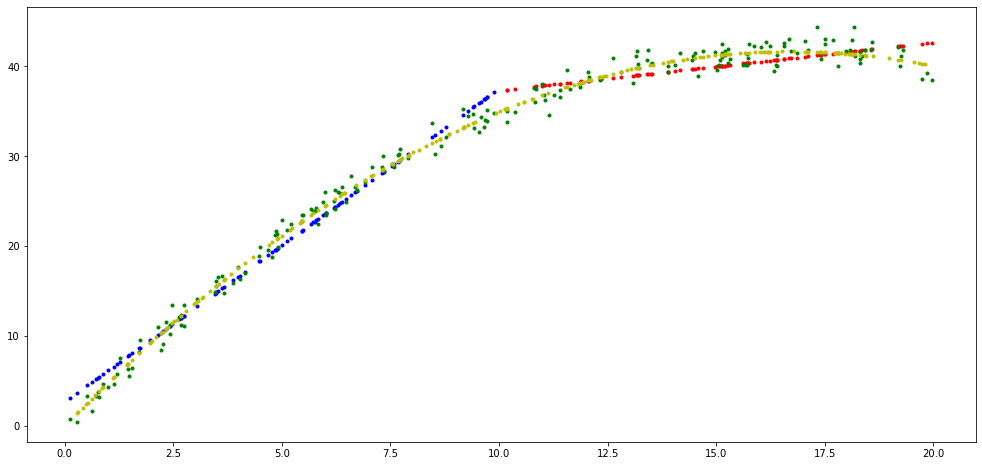

In [111]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_pred1, "b.")
plt.plot(X_test2, y_pred2, "r.")
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")
plt.plot(X_test, y_predPipe, "y.")

['1', 'x0', 'x0^2']

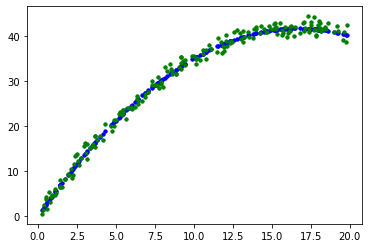

In [109]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)

model.fit(X_train, y_train)
y_predPipe = model.predict(X_test)
plt.plot(X_test, y_predPipe, "b.")
plt.plot(X_test, y_test, "g.")
plt.plot(X_test, y_predPipe, "b.")
plt.plot(X_test, y_test, "g.")

model.steps[0][1].get_feature_names()

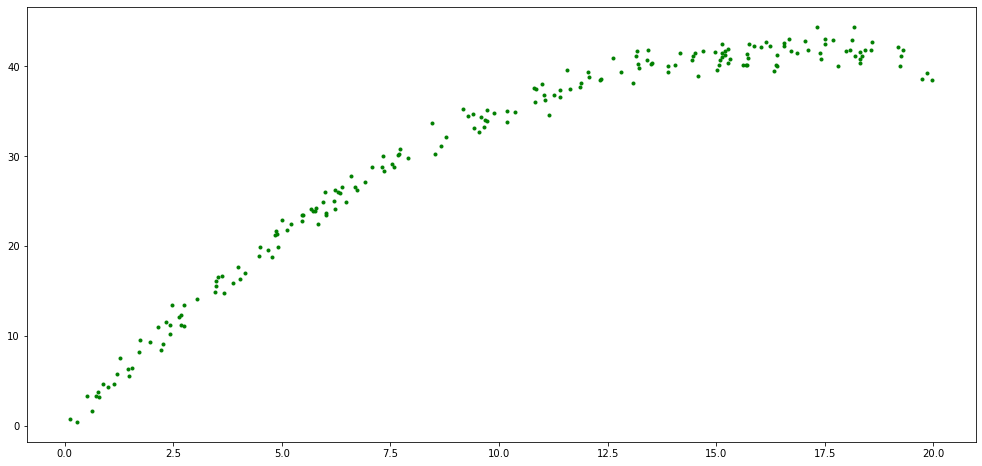

In [113]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")

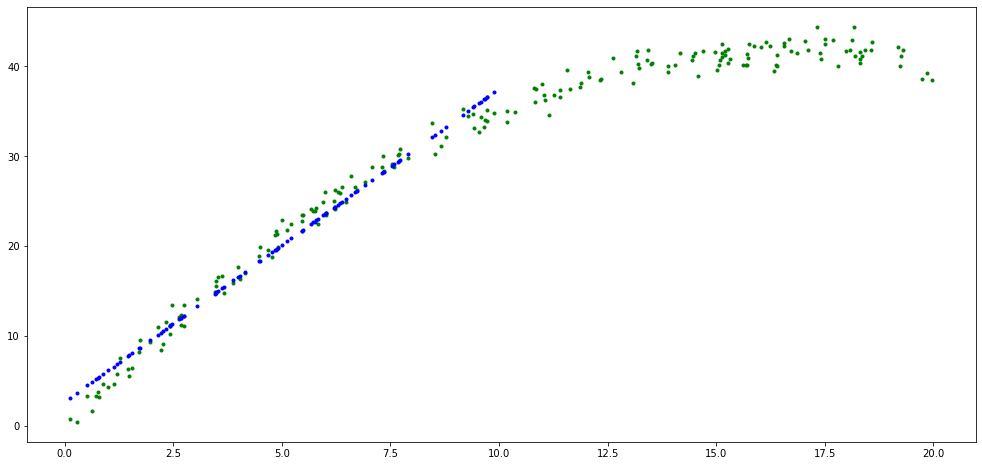

In [114]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")
plt.plot(X_test1, y_pred1, "b.")

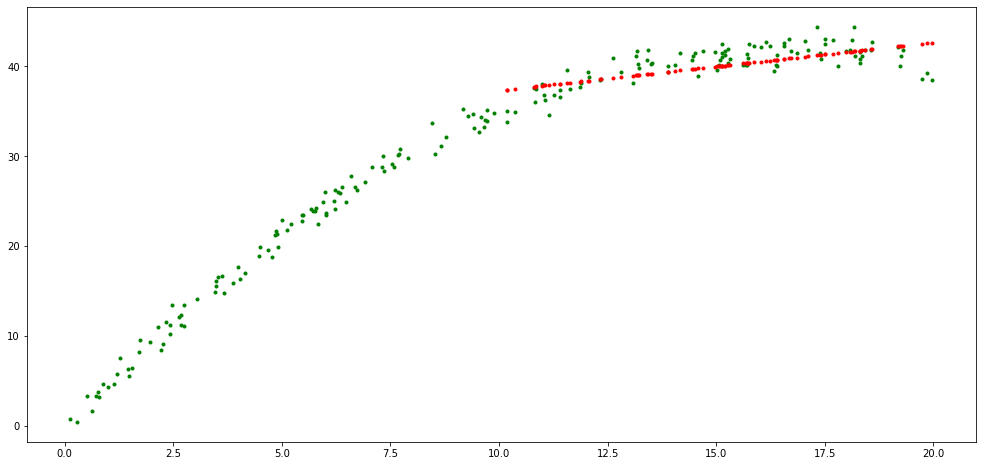

In [115]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")
plt.plot(X_test2, y_pred2, "r.")

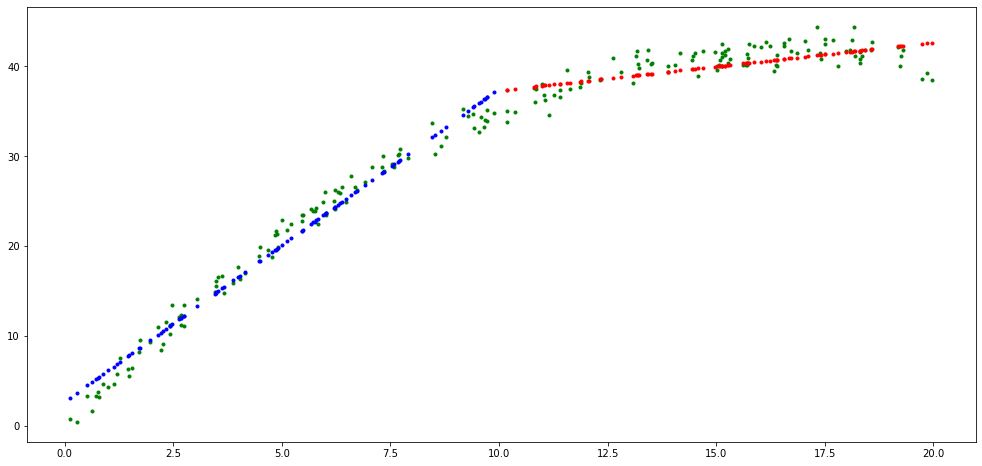

In [116]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")
plt.plot(X_test1, y_pred1, "b.")
plt.plot(X_test2, y_pred2, "r.")

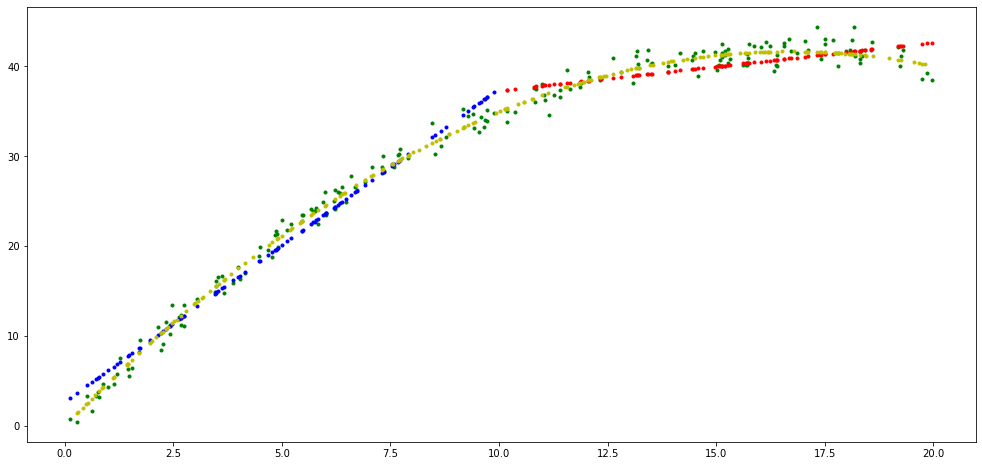

In [117]:
plt.figure(figsize=(17,8))
plt.plot(X_test1, y_test1, "g.")
plt.plot(X_test2, y_test2, "g.")
plt.plot(X_test1, y_pred1, "b.")
plt.plot(X_test2, y_pred2, "r.")
plt.plot(X_test, y_predPipe, "y.")